In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import mysql.connector
from scipy.stats import pearsonr

In [2]:
# Connect to MySQL database

cnx = pymysql.connect(
    user='root', 
    password='78203393',
    host='localhost',
    database='cafe_sales'
)
# Read data from SQL table
df_raw = pd.read_sql("SELECT * FROM clean_cafe_sales", con=cnx)
cnx.close()

C:\Users\FITRAH\AppData\Local\Temp\ipykernel_22740\2016906649.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_raw = pd.read_sql("SELECT * FROM clean_cafe_sales", con=cnx)


In [3]:
#Copy dataframe 
df_preprocess = df_raw.copy()

---

## Understand Data Structure (Initial EDA)
### General Overview

In [4]:
# Display shape of datafreme
df_preprocess.shape

(10000, 8)

In [5]:
# Display 5 top data

df_preprocess.head()

,transaction_id,item,quantity,price_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,None
3,TXN_7034554,Salad,2.0,5.0,10.0,None,None,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [6]:
# Display 5 last data of dataframe

df_preprocess.tail()

,transaction_id,item,quantity,price_unit,total_spent,payment_method,location,transaction_date
9995,TXN_7672686,Coffee,2.0,2.0,4.0,None,None,2023-08-30
9996,TXN_9659401,None,3.0,NaN,3.0,Digital Wallet,None,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,None,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,None,2023-12-02
9999,TXN_6170729,Sandwich,3.0,4.0,12.0,Cash,In-store,2023-11-07


In [7]:
#Display information of dataframe

df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    10000 non-null  object 
 1   item              9031 non-null   object 
 2   quantity          9521 non-null   float64
 3   price_unit        9467 non-null   float64
 4   total_spent       9498 non-null   float64
 5   payment_method    6822 non-null   object 
 6   location          6039 non-null   object 
 7   transaction_date  9221 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [8]:
# display data type

df_preprocess.dtypes

transaction_id       object
item                 object
quantity            float64
price_unit          float64
total_spent         float64
payment_method       object
location             object
transaction_date     object
dtype: object

In [9]:
# Display total null each columns
df_preprocess.isnull().sum()

transaction_id         0
item                 969
quantity             479
price_unit           533
total_spent          502
payment_method      3178
location            3961
transaction_date     779
dtype: int64

In [10]:
# Display percentage null each columns
df_preprocess.isnull().sum()/len(df_preprocess)*100

transaction_id       0.00
item                 9.69
quantity             4.79
price_unit           5.33
total_spent          5.02
payment_method      31.78
location            39.61
transaction_date     7.79
dtype: float64

In [11]:
#display unique variable each columns

df_preprocess.nunique()

transaction_id      10000
item                    8
quantity                5
price_unit              5
total_spent            15
payment_method          3
location                2
transaction_date      365
dtype: int64

## Exploratory Visualization

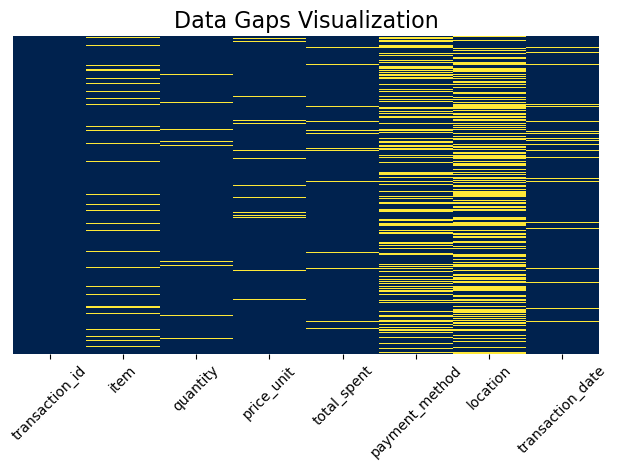

In [12]:


sns.heatmap(df_preprocess.isnull(), cbar=False, yticklabels=False, cmap='cividis')
plt.title('Data Gaps Visualization', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Stores data from both numerical and categorical variables

numeric_cols = df_preprocess.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_preprocess.select_dtypes(include=['object']).columns.tolist()

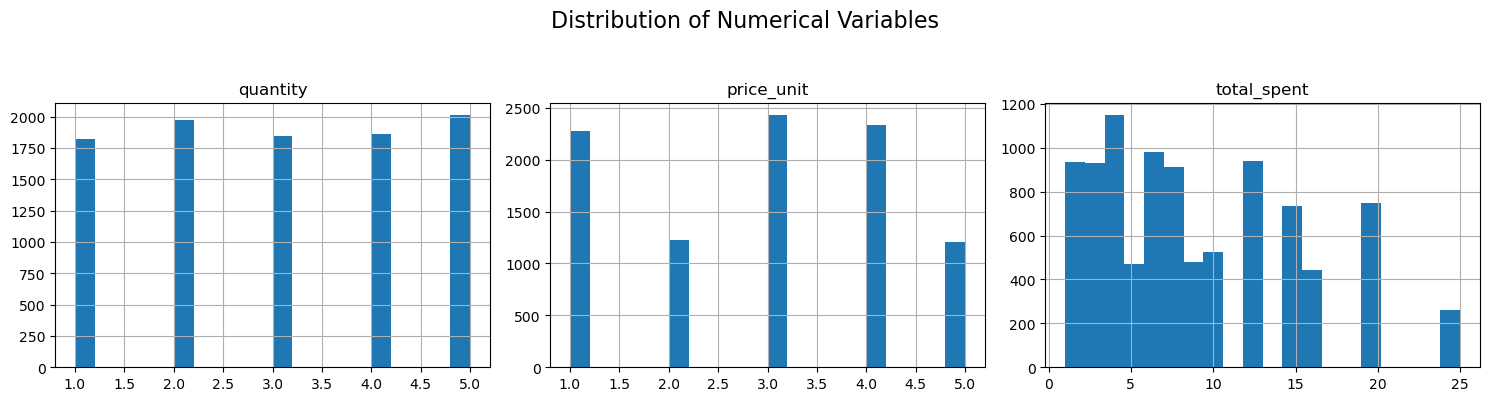

In [14]:
# Visualisasi Distribusi Variabel Numerik
# This will create histograms for each numeric column to visualize their distributions

df_preprocess[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for the title
plt.show()

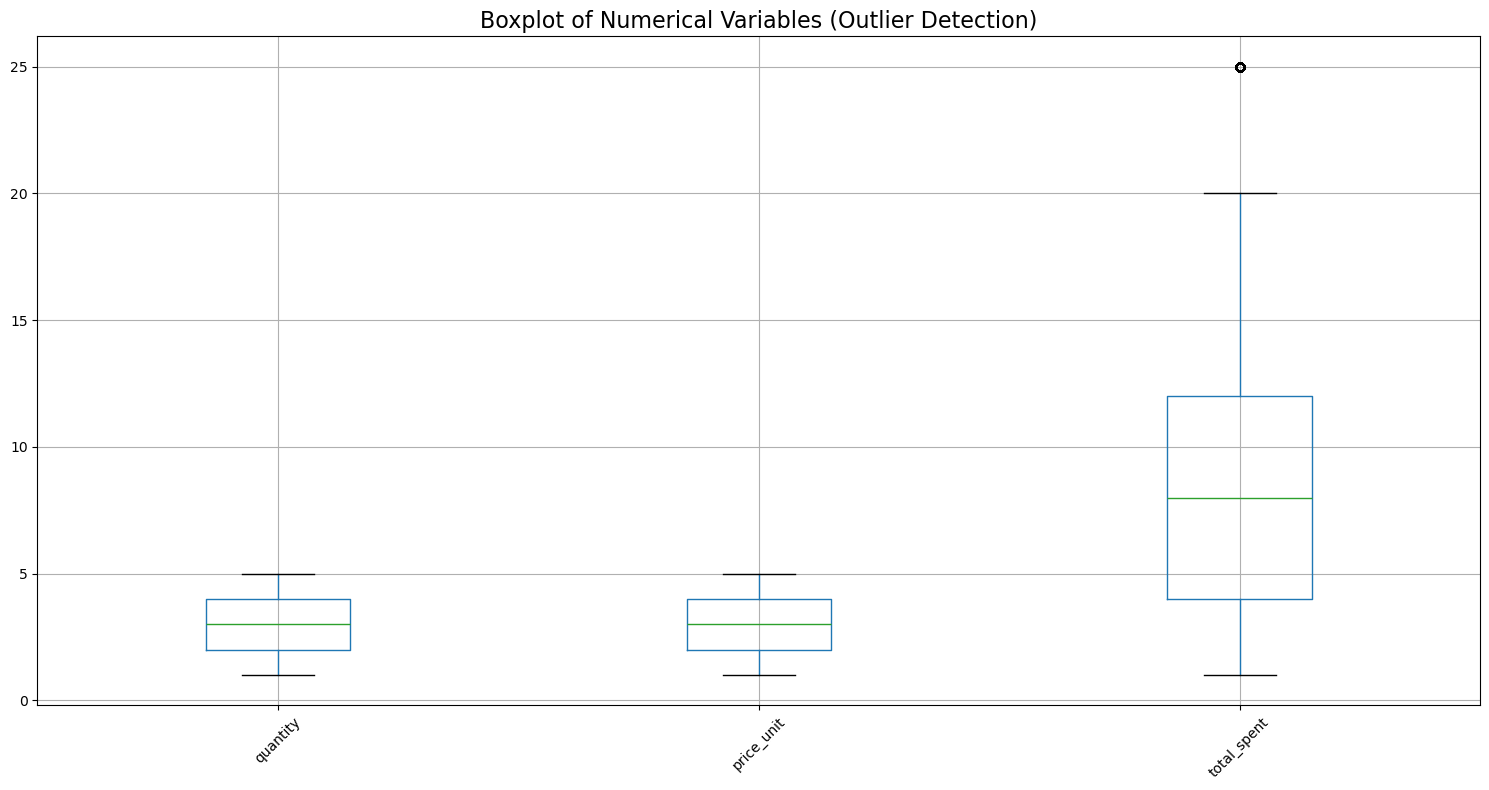

In [15]:
#Boxplot Visualization

plt.figure(figsize=(15, 8))
df_preprocess[numeric_cols].boxplot()
plt.title('Boxplot of Numerical Variables (Outlier Detection)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

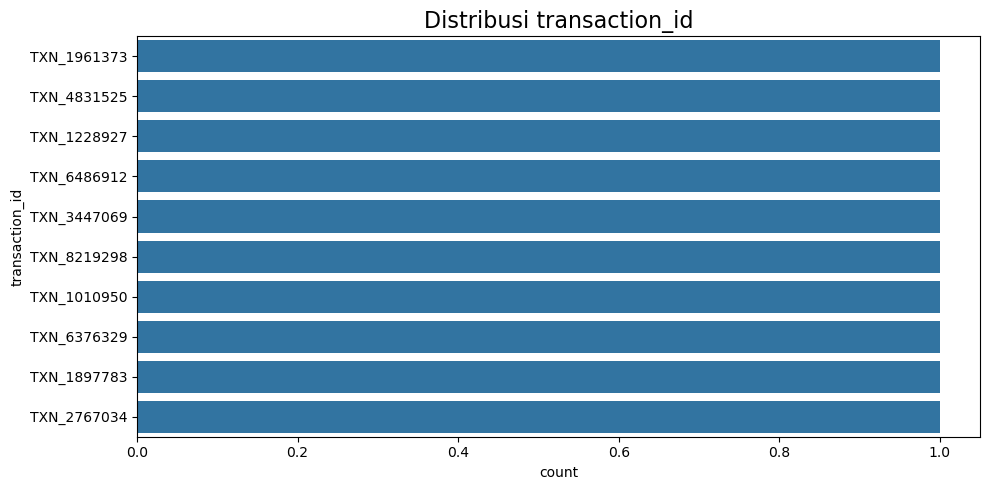

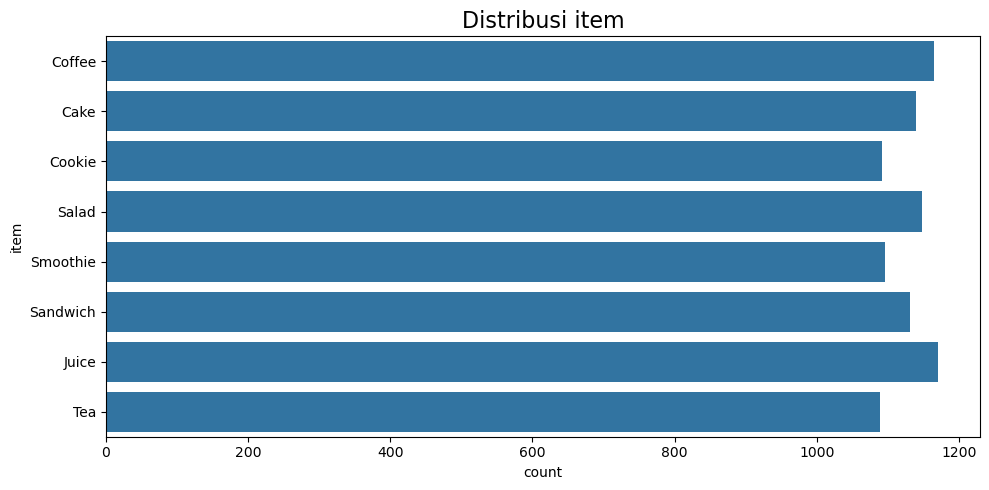

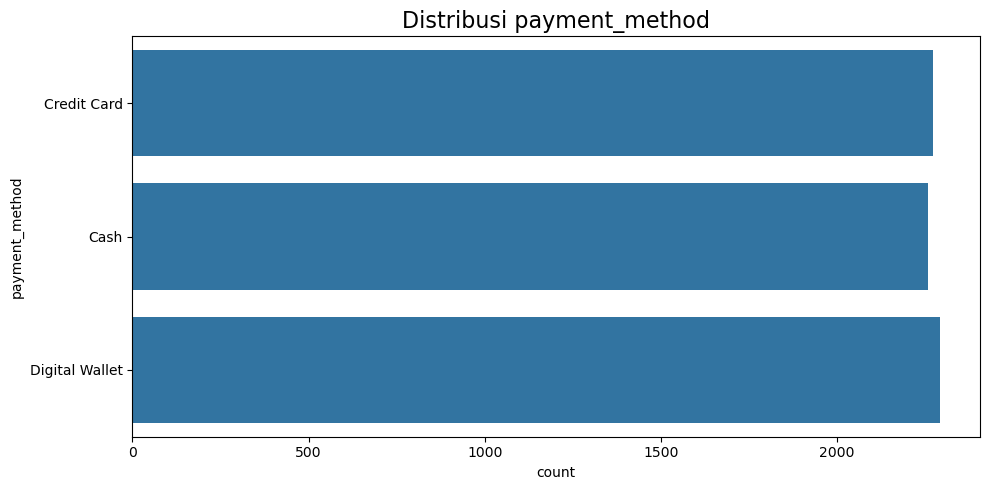

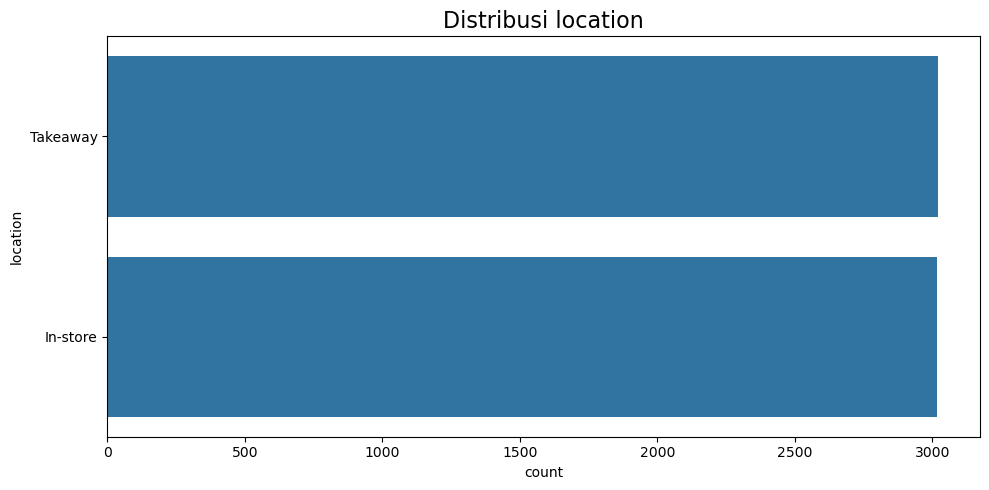

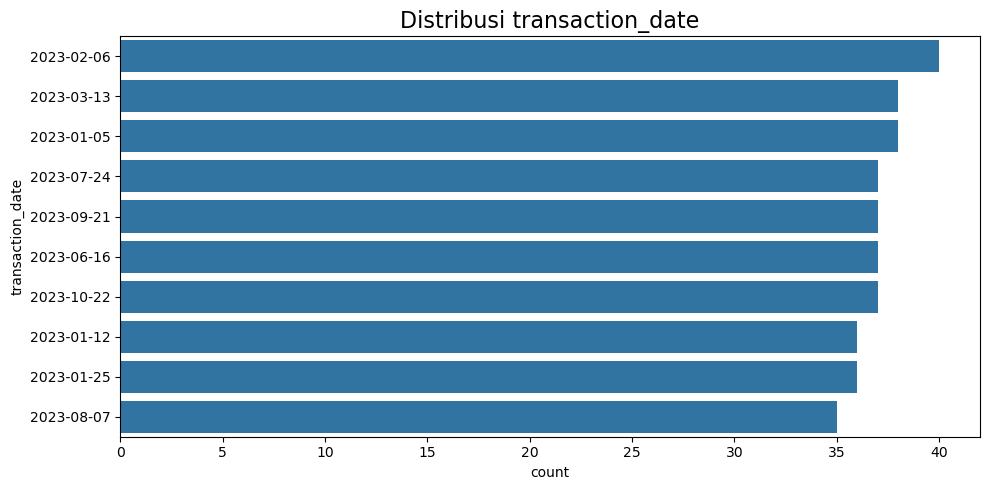

In [16]:
# Visualisasi Distribusi Kategori
# This will create count plots for each categorical column to visualize their distributions

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    if df_preprocess[col].nunique() > 10:
        top_categories = df_preprocess[col].value_counts().nlargest(10).index
        filtered_df = df_preprocess[df_preprocess[col].isin(top_categories)]
        sns.countplot(y=col, data=filtered_df, order=top_categories)
    else:
        sns.countplot(y=col, data=df_preprocess)
    
    plt.title(f'Distribusi {col}', fontsize=16)
    plt.tight_layout()
    plt.show()

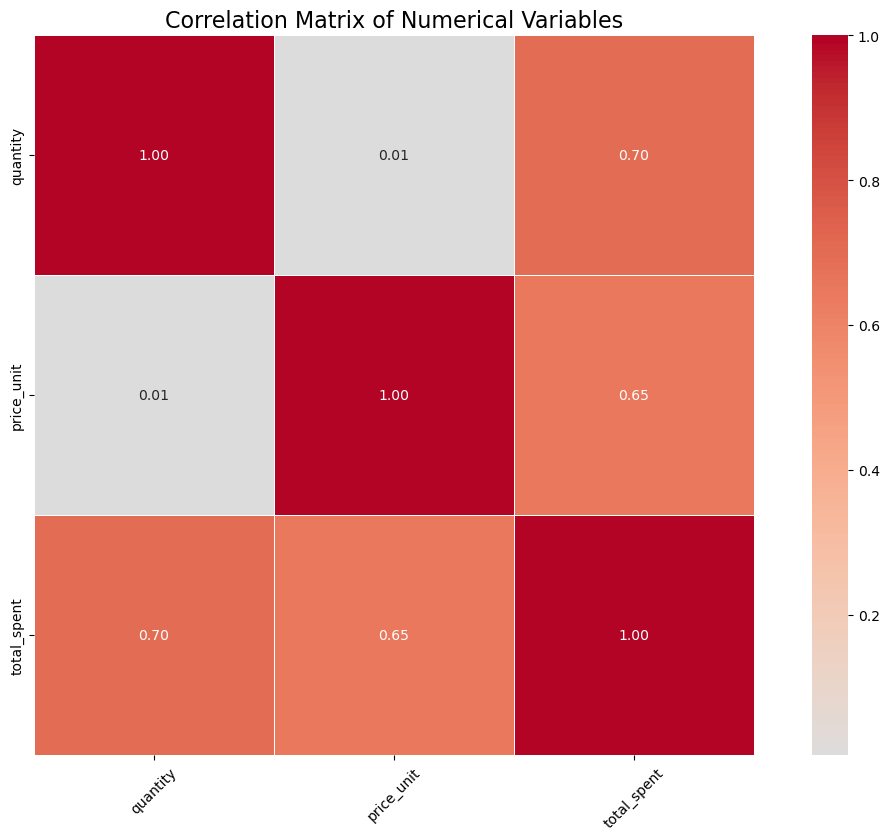

In [17]:
# Heatmap of Correlation Matrix (Numerical Variables)

plt.figure(figsize=(12, 8))
correlation_matrix = df_preprocess[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [18]:
# display statistical summary of the DataFrame
df_preprocess.describe()

,quantity,price_unit,total_spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.890145,8.889240
std,1.419007,1.354374,6.036231
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [19]:

df_preprocess.describe(include='object')

,transaction_id,item,payment_method,location,transaction_date
count,10000,9031,6822,6039,9221
unique,10000,8,3,2,365
top,TXN_1961373,Juice,Digital Wallet,Takeaway,2023-02-06
freq,1,1171,2291,3022,40


In [21]:
df_preprocess['item'].value_counts()/len(df_preprocess['item'])*100

item
Juice       11.71
Coffee      11.65
Salad       11.48
Cake        11.39
Sandwich    11.31
Smoothie    10.96
Cookie      10.92
Tea         10.89
Name: count, dtype: float64

In [23]:
df_preprocess['payment_method'].value_counts()/len(df_preprocess['payment_method'])*100

payment_method
Digital Wallet    22.91
Credit Card       22.73
Cash              22.58
Name: count, dtype: float64

In [24]:
df_preprocess['location'].value_counts()/len(df_preprocess['location'])*100

location
Takeaway    30.22
In-store    30.17
Name: count, dtype: float64

---

## Data Preparation
### Data Cleaning
#### Handling Missing values

In [27]:
# Handle numeric_cols with median

df_preprocess[numeric_cols] = df_preprocess[numeric_cols].fillna(df_preprocess[numeric_cols].median())

In [28]:
df_preprocess['total_spent']= df_preprocess['price_unit']*df_preprocess['quantity']

In [29]:
# Change transaction date type to date

df_preprocess['transaction_date'] = pd.to_datetime(df_preprocess['transaction_date'], errors='coerce')

In [30]:
# handle missing date with median due to stable distribution

df_preprocess['transaction_date']=df_preprocess['transaction_date'].fillna(df_preprocess['transaction_date'].median())

In [31]:
# Handle missing values for categorical_cols with mode

df_preprocess[categorical_cols] = df_preprocess[categorical_cols].apply(
    lambda col: col.fillna(col.mode()[0])
)

In [32]:
#Derive date, month, and year from transaction data

df_preprocess['trans_year'] = df_preprocess['transaction_date'].dt.year
df_preprocess['trans_month'] = df_preprocess['transaction_date'].dt.month
df_preprocess['trans_day'] = df_preprocess['transaction_date'].dt.day

In [33]:
df_outliers = df_preprocess.copy()

In [34]:
# Function to mark outliers as NaN
# This function calculates the Interquartile Range (IQR) and mark outliers as NaN

def mark_outliers_as_nan(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Create mask for outliers
    outlier_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    

    #Return the modified DataFrame
    return df.assign(**{column_name: np.where(outlier_mask, np.nan, df[column_name])})

In [35]:
original_missing_count = df_outliers['total_spent'].isnull().sum()

df_outliers=mark_outliers_as_nan(df_outliers, 'total_spent')

print("evised Count of Missing Data:", df_outliers['total_spent'].isnull().sum())

new_missing_count = df_outliers['total_spent'].isnull().sum()

print("Outliers marked as NaN:", new_missing_count - original_missing_count)

evised Count of Missing Data: 240
Outliers marked as NaN: 240


In [36]:
df_preprocess['total_spent'].describe()

count    10000.000000
mean         8.776800
std          5.956906
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         25.000000
Name: total_spent, dtype: float64

In [37]:
df_preprocess[df_preprocess['total_spent']>24].value_counts()

transaction_id  item   quantity  price_unit  total_spent  payment_method  location  transaction_date  trans_year  trans_month  trans_day
TXN_1037486     Salad  5.0       5.0         25.0         Digital Wallet  In-store  2023-07-02        2023        7            2            1
TXN_1122699     Juice  5.0       5.0         25.0         Digital Wallet  In-store  2023-10-14        2023        10           14           1
TXN_6265785     Juice  5.0       5.0         25.0         Credit Card     Takeaway  2023-08-26        2023        8            26           1
TXN_6324818     Salad  5.0       5.0         25.0         Digital Wallet  Takeaway  2023-06-26        2023        6            26           1
TXN_6342161     Salad  5.0       5.0         25.0         Digital Wallet  Takeaway  2023-01-08        2023        1            8            1
                                                                                                                                           ..
TXN_3952218

In [38]:
df_outliers.isnull().sum()

transaction_id        0
item                  0
quantity              0
price_unit            0
total_spent         240
payment_method        0
location              0
transaction_date      0
trans_year            0
trans_month           0
trans_day             0
dtype: int64

In [39]:
# handle Null value from outliers with median

df_outliers['total_spent']=df_outliers['total_spent'].fillna(df_outliers['total_spent'].median())

In [40]:
df_anom=df_outliers.copy()

In [41]:
# Function to detect anomal
# This function calculates the Interquartile Range (IQR)

def anomaly_detection_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (df[column_name] <= lower_bound) | (df[column_name] >= upper_bound)

In [42]:
df_anom['anom_total_spent']=anomaly_detection_iqr(df_anom, 'total_spent')
df_anom['anom_total_spent'].value_counts()

anom_total_spent
False    10000
Name: count, dtype: int64

## EDA

In [43]:
df_eda=df_preprocess.copy()

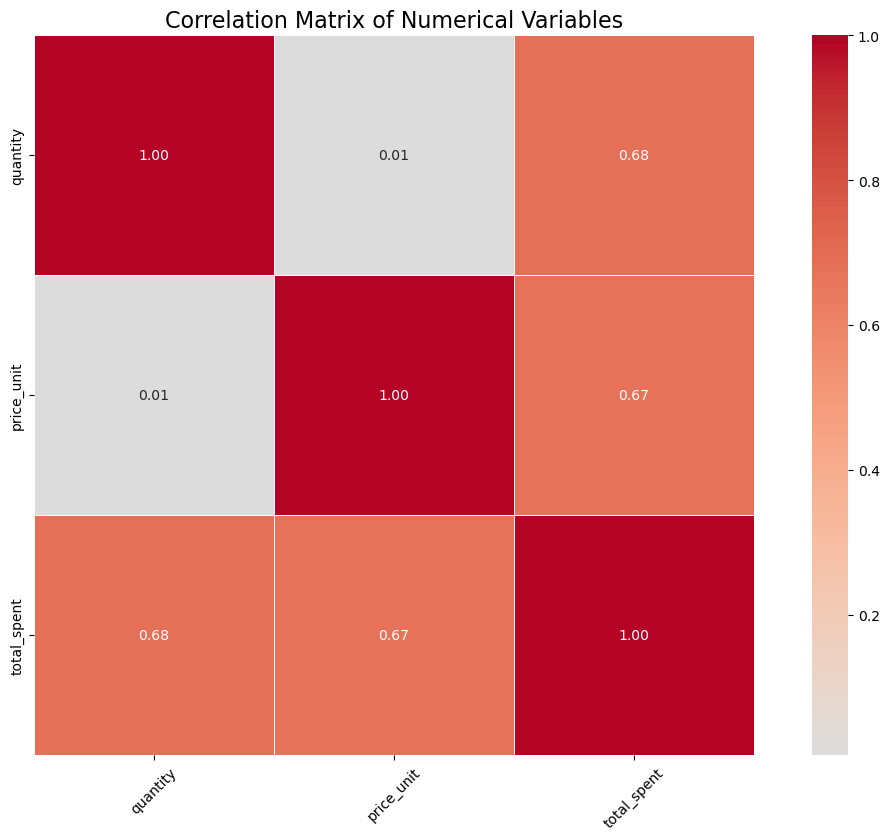

In [44]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_eda[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [47]:

correlation_sales, p_value_sales = pearsonr(df_eda['quantity'], df_eda['price_unit'])

print(f"Corelation between Quantity and Price Unit: {correlation_sales:.4f}")
print(f"P-Value: {p_value_sales:.4f}")

# Keputusan Statistik
alpha = 0.05
if p_value_sales < alpha:
    print("We reject the null hypothesis (H0). There is a statistically significant relationship between Quantity and Unit Price.")
else:
    print("We fail to reject the null hypothesis (H0). The evidence is insufficient to conclude that the relationship is statistically significant")

Corelation between Quantity and Price Unit: 0.0057
P-Value: 0.5718
We fail to reject the null hypothesis (H0). The evidence is insufficient to conclude that the relationship is statistically significant


**Corelation Test: Quantity Vs Price Unit**

- **Correlation Koef**: 0.0057 → weak
- **P-Value**: 0.5718
- **Alpha**: 0.05

**Hipotesis:**
- H₀: There is no linear relationship between quantity and price unit
- H₁: There is a significant linear relationship between social media budget and sales.

**Statistical Decision:** Because the p-value is greater than alpha, the null hypothesis (H₀) is accepted. The evidence is insufficient to conclude that the relationship is statistically significant.

**Interpretasi Bisnis:** The analysis results indicate that the relationship between the tested variables is not statistically strong. In other words, this factor has not been proven to have a significant impact on business performance. Therefore, the company should not use this factor as a primary basis for decision-making and may need to explore other factors with stronger influence.

## Sales Performance:
#### What are the best-selling items?

In [93]:
best_selling = df_eda.groupby('item')['quantity'].sum().sort_values(ascending=False).reset_index()
best_selling

,item,quantity
0,Juice,6435.0
1,Coffee,3551.0
2,Salad,3469.0
3,Cake,3467.0
4,Sandwich,3428.0
5,Smoothie,3353.0
6,Tea,3319.0
7,Cookie,3249.0


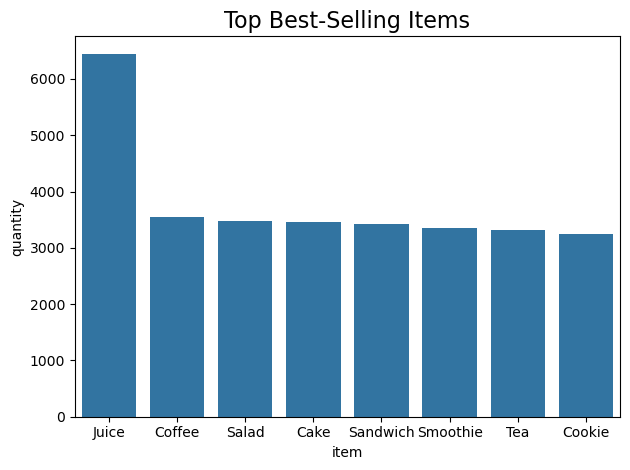

In [49]:
sns.barplot(data=best_selling,x='item',y='quantity')
plt.title('Top Best-Selling Items', fontsize=16)
plt.tight_layout()
plt.show()

### What is the total revenue and average transaction value?

In [50]:
total_revenue = df_eda['total_spent'].sum()
avg_revenue = df_eda['total_spent'].mean()

print(f'Total Revenue = {total_revenue}')
print(f'Average of Revenue = {avg_revenue}')

Total Revenue = 87768.0
Average of Revenue = 8.7768


### How are sales trending over time (daily, monthly)?

In [51]:
daily_trending=df_eda.set_index('transaction_date').resample('D')['total_spent'].sum()
daily_trending.reset_index()

,transaction_date,total_spent
0,2023-01-01,176.0
1,2023-01-02,148.0
2,2023-01-03,139.0
3,2023-01-04,255.0
4,2023-01-05,330.0
...,...,...
360,2023-12-27,211.0
361,2023-12-28,181.0
362,2023-12-29,158.0
363,2023-12-30,201.0


In [111]:
daily_trending.sort_values(ascending=False)

transaction_date
2023-07-02    7329.0
2023-07-24     360.0
2023-11-07     352.0
2023-06-16     350.0
2023-01-12     340.0
               ...  
2023-09-24     107.0
2023-07-22     104.0
2023-08-08     103.0
2023-07-30      94.0
2023-10-05      89.0
Name: total_spent, Length: 365, dtype: float64

In [102]:
df_eda.head()

,transaction_id,item,quantity,price_unit,total_spent,payment_method,location,transaction_date,trans_year,trans_month,trans_day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023,9,8
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,2023,5,16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-02,2023,7,2
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,2023,4,27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023,6,11


In [ ]:
item_daily=df_eda.groupby(['item','trans_day']).size().reset_index(name='count')
item_daily

,item,trans_day,count
0,Cake,1,29
1,Cake,2,121
2,Cake,3,34
3,Cake,4,30
4,Cake,5,30
...,...,...,...
243,Tea,27,28
244,Tea,28,30
245,Tea,29,30
246,Tea,30,35


In [108]:
item_avg_daily = (
    item_daily
    .groupby('item')['count']
    .mean()
    .reset_index(name='avg_per_day')
    .sort_values(by='avg_per_day', ascending=False)
)

item_avg_daily

,item,avg_per_day
3,Juice,69.032258
1,Coffee,37.580645
4,Salad,37.032258
0,Cake,36.741935
5,Sandwich,36.483871
6,Smoothie,35.354839
2,Cookie,35.225806
7,Tea,35.129032


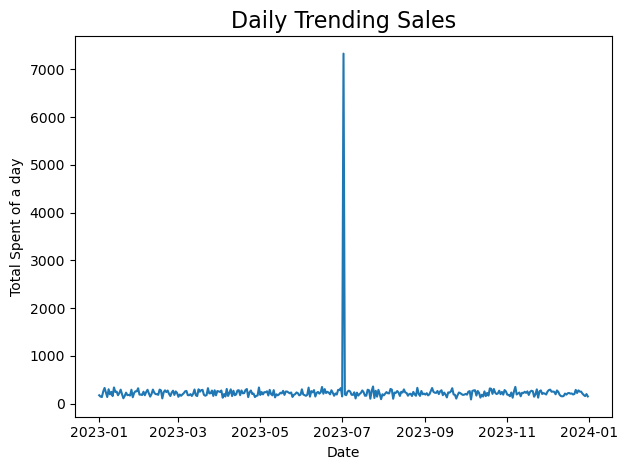

In [52]:
sns.lineplot(data=daily_trending)
plt.title('Daily Trending Sales', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Spent of a day')
plt.tight_layout()
plt.show()


In [53]:
monthly_trending=df_eda.set_index('transaction_date').resample('ME')['total_spent'].sum()
monthly_trending.reset_index()

,transaction_date,total_spent
0,2023-01-31,6777.0
1,2023-02-28,6265.0
2,2023-03-31,6829.0
3,2023-04-30,6720.0
4,2023-05-31,6619.0
5,2023-06-30,7104.0
6,2023-07-31,13658.0
7,2023-08-31,6845.0
8,2023-09-30,6553.0
9,2023-10-31,6995.0


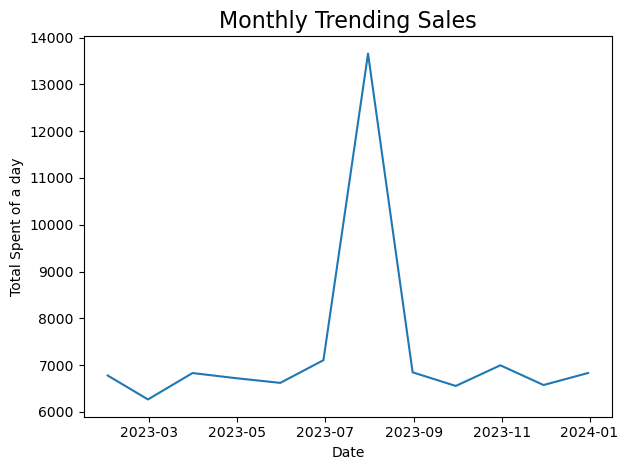

In [54]:
sns.lineplot(data=monthly_trending)
plt.title('Monthly Trending Sales', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Spent of a day')
plt.tight_layout()
plt.show()

In [ ]:
# Display Calculate the number of items sold per month
item_monthly=df_eda.groupby(['item','trans_month']).size().reset_index(name='count')
item_monthly

,item,trans_month,count
0,Cake,1,92
1,Cake,2,73
2,Cake,3,97
3,Cake,4,83
4,Cake,5,85
...,...,...,...
91,Tea,8,101
92,Tea,9,93
93,Tea,10,96
94,Tea,11,72


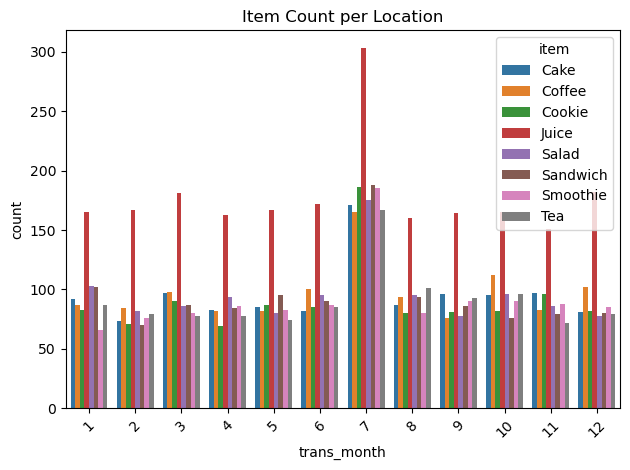

In [ ]:
sns.barplot(data=item_monthly, x='trans_month', y='count', hue='item')
plt.xticks(rotation=45)
plt.title('Item Count per Month')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average number of items sold per month

item_avg_monthly=(
    item_monthly.
    groupby('item')['count'].
    mean().
    reset_index(name='avg_per_month').
    sort_values(by='avg_per_month', ascending=False)
)
item_avg_monthly

,item,avg_per_month
3,Juice,178.333333
1,Coffee,97.083333
4,Salad,95.666667
0,Cake,94.916667
5,Sandwich,94.250000
6,Smoothie,91.333333
2,Cookie,91.000000
7,Tea,90.750000


#### Check anomaly of Sales Trend

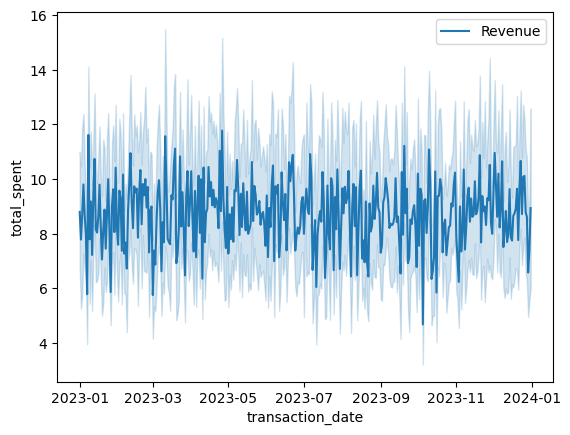

In [55]:
sns.lineplot(data=df_eda, x='transaction_date', y='total_spent', label='Revenue')
plt.show()

In [56]:
df_anom_selling = df_eda.copy()

In [57]:
def anomaly_detection_trend_of_sell(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    def classify(value):
        if value < lower_bound:
            return 'fell'
        elif value > upper_bound:
            return 'grew'
        else:
            return 'normal'

    return df[column_name].apply(classify)


In [58]:
df_anom_selling['anomaly trend']=anomaly_detection_trend_of_sell(df_anom_selling,'total_spent')

In [59]:
df_anom_selling['anomaly trend'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: anomaly trend, dtype: object

In [116]:
df_anom_selling['anomaly trend'].value_counts()

anomaly trend
normal    9760
grew       240
Name: count, dtype: int64

---

## Customer Behavior:
### What is the preferred payment method?

In [60]:
payment_method = df_eda['payment_method'].value_counts()
payment_method

payment_method
Digital Wallet    5469
Credit Card       2273
Cash              2258
Name: count, dtype: int64

In [ ]:
# Percentage paymennt of customer

payment_percentage = df_eda['payment_method'].value_counts(normalize=True) * 100
payment_percentage

payment_method
Digital Wallet    54.69
Credit Card       22.73
Cash              22.58
Name: proportion, dtype: float64

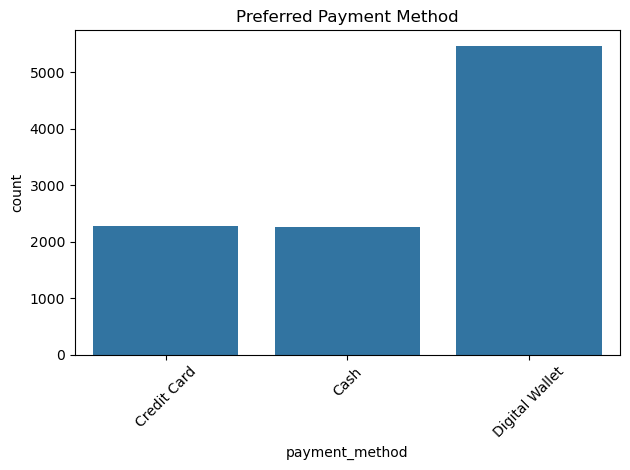

In [61]:
sns.countplot(data=df_eda, x='payment_method')
plt.title('Preferred Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Do customers prefer eating In-store or Takeaway?

In [62]:
df_eda.head()

,transaction_id,item,quantity,price_unit,total_spent,payment_method,location,transaction_date,trans_year,trans_month,trans_day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023,9,8
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,2023,5,16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-02,2023,7,2
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,2023,4,27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023,6,11


In [63]:
eating = df_eda['location'].value_counts()
eating

location
Takeaway    6983
In-store    3017
Name: count, dtype: int64

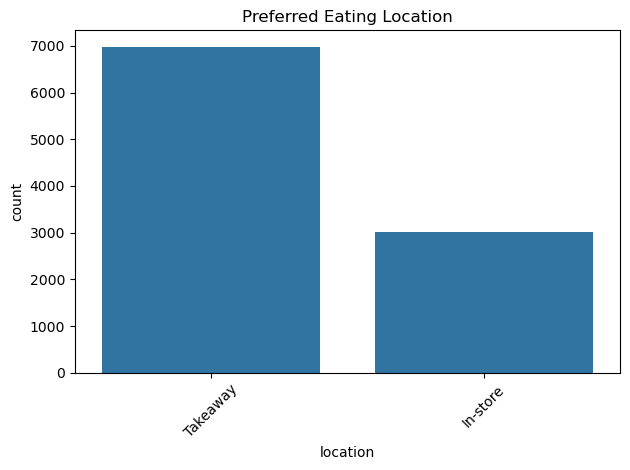

In [64]:
sns.countplot(data=df_eda, x='location')
plt.title('Preferred Eating Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What does the distribution of order quantities look like?

In [65]:
df_eda['quantity'].describe()

count    10000.000000
mean         3.027100
std          1.384614
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: quantity, dtype: float64

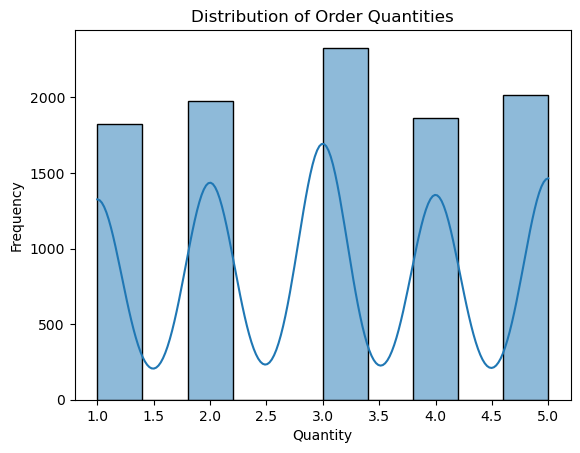

In [66]:
sns.histplot(df_eda['quantity'], bins=10, kde=True)
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [123]:
df_eda.head()

,transaction_id,item,quantity,price_unit,total_spent,payment_method,location,transaction_date,trans_year,trans_month,trans_day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023,9,8
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,2023,5,16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-02,2023,7,2
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,2023,4,27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023,6,11


---

### Operational Insights:
### Are there specific items that frequently have data issues (hinting at a point-of-sale problem)?

### Load raw data first

In [67]:
cnx = pymysql.connect(
    user='root', 
    password='78203393',
    host='localhost',
    database='cafe_sales'
)
# Read data from SQL table
df_raw_sql = pd.read_sql("SELECT * FROM raw_cafe_sales", con=cnx)
cnx.close()

C:\Users\FITRAH\AppData\Local\Temp\ipykernel_22740\4244512716.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_raw_sql = pd.read_sql("SELECT * FROM raw_cafe_sales", con=cnx)


In [ ]:
# Flag in has_issue if atleast 1 column have Null, unknown or error

issue_mask = df_raw_sql.isnull() | df_raw_sql.apply(lambda col: col.astype(str).str.lower().isin(['unknown', 'error']))
df_raw_sql['has_issue'] = issue_mask.any(axis=1)

In [ ]:
# groupby item that have issue (null/error/unknown)

item_issue_count = df_raw_sql.groupby('item')['has_issue'].size().sort_values(ascending=False).reset_index()
item_issue_count

,item,has_issue
0,Juice,1171
1,Coffee,1165
2,Salad,1148
3,Cake,1139
4,Sandwich,1131
5,Smoothie,1096
6,Cookie,1092
7,Tea,1089
8,UNKNOWN,344
9,,333


In [ ]:
# count variabels of has_issue
# True for data that has atleast 1 invalid data (null/error/unknown)
# false for that valid

df_raw_sql['has_issue'].value_counts()

has_issue
False    7155
True     2845
Name: count, dtype: int64

In [ ]:
#avg True 
df_raw_sql['has_issue'].mean()

0.2845

In [118]:
1-df_raw_sql['has_issue'].mean()

0.7155

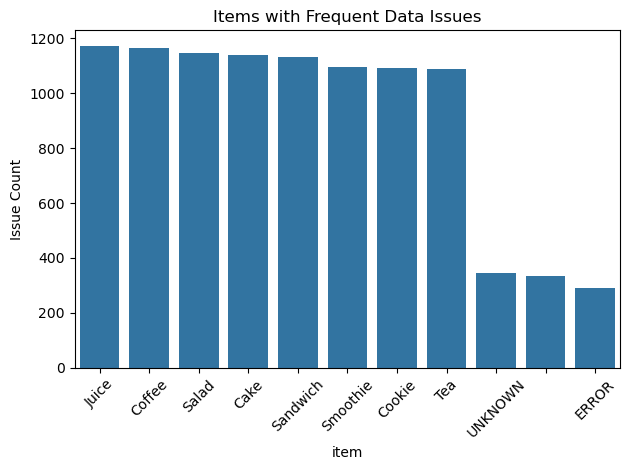

In [126]:
sns.barplot(data=item_issue_count,x='item', y='has_issue')
plt.title('Items with Frequent Data Issues')
plt.xticks(rotation=45)
plt.ylabel('Issue Count')
plt.tight_layout()
plt.show()

In [91]:

item_location = df_eda.groupby('item')['location'].value_counts(ascending=False).reset_index()
item_location

,item,location,count
0,Cake,Takeaway,818
1,Cake,In-store,321
2,Coffee,Takeaway,847
3,Coffee,In-store,318
4,Cookie,Takeaway,760
5,Cookie,In-store,332
6,Juice,Takeaway,1485
7,Juice,In-store,655
8,Salad,Takeaway,777
9,Salad,In-store,371


---

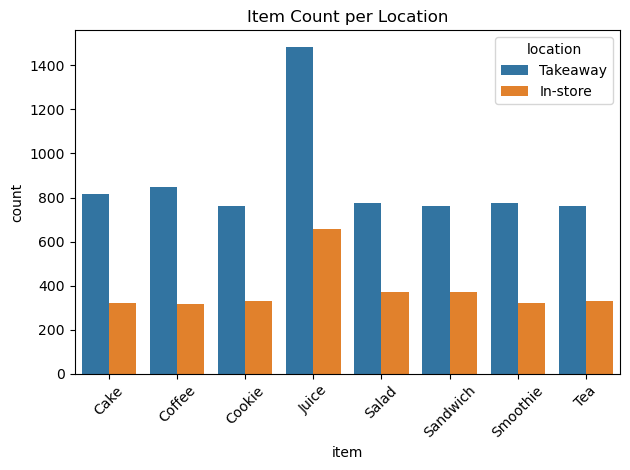

In [92]:
sns.barplot(data=item_location, x='item', y='count', hue='location')
plt.xticks(rotation=45)
plt.title('Item Count per Location')
plt.tight_layout()
plt.show()

### How does sales distribution look across different locations? (Though Location seems to only have two values)

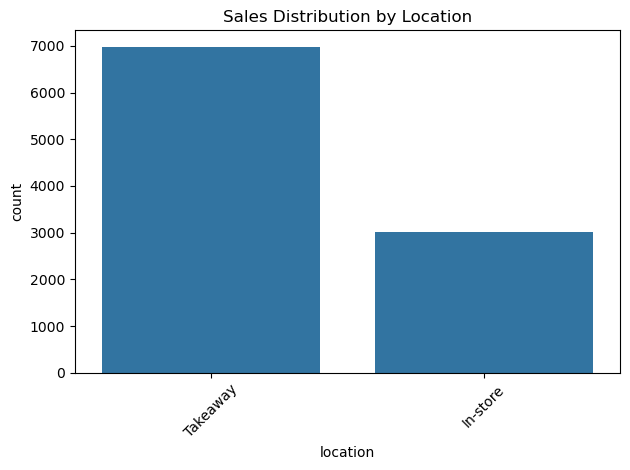

In [ ]:
# Display distribution accross different locations

sns.countplot(data=df_eda, x='location')
plt.title('Sales Distribution by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

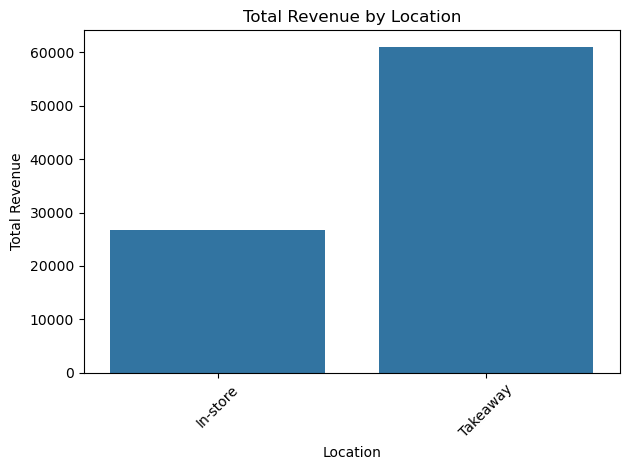

In [ ]:
# Display Bar plot between Location and total spent

location_sales = df_eda.groupby('location')['total_spent'].sum().reset_index()

sns.barplot(data=location_sales, x='location', y='total_spent')
plt.title('Total Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

# Report

## Executive Summary

Based on the Café Sales dataset, we identified that Juice is the best-selling item, with total sales of 6,435 units throughout 2023, and daily and monthly average sales of 69 and 178 units, respectively. Customers most frequently used digital wallets as their payment method and preferred takeaway over enjoying their drinks in-store.
Sales distribution throughout 2023 was generally stable with several growth spikes, resulting in total revenue of $87,768. However, there were 2,845 issues in the dataset, including transactions with a value of $0, and data recorded as error or unknown in transactions and item names.

## Findings

1.	Best-Selling Product: Juice is the most popular item (6,435 units sold).
2.	Payment Preference: Digital wallets are most dominant (54.69%), followed by card (22.73%) and cash (22.58%).
3.	Consumption Pattern: 70% of customers chose takeaway, 30% dine-in.
4.	Sales Trend: Stable throughout the year with peaks mid-year.
5.	Operational Issues: 2,845 problematic transactions (Null, ERROR and UNKNOWN data).

## Recommendation

1.	Flagship Product Optimization

a.	Increase stock and promotions for Juice products.

b.	Develop new variants based on consumer preferences (e.g., juice mixes or coffee latte).

2.	Enhanced Digital Experience

a.	Enhance and promote digital wallet features for easier transactions.

b.	Implement a digital loyalty program.

3.	Improve Operational Efficiency

a.	Implement a data validation system at the point of entry to reduce errors.

b.	Provide staff training to ensure data input accuracy.

4.	Customer Experience Development

a.	Optimize takeaway service with better and more practical packaging.

b.	Reorganize the space to enhance the dine-in experience

5.	Continuous Monitoring

a.	Develop a real-time dashboard to monitor sales and operational performance.

b.	Establish a regular monthly reporting system for periodic evaluation


Note: Recommendations are based on 2023 data. Periodic evaluation is needed to adapt to current market dynamics.